In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/5HTGIF


In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from src.Simulation import GIFnet_Simulation

# Load data

In [3]:
DATA_PATH = os.path.join('data', 'simulations', 'GIF_network')
simfiles = {}
for fname in os.listdir(DATA_PATH):
    if fname[-4:].lower() == 'hdf5':
        try:
            simfiles[fname[:-5]] = GIFnet_Simulation(os.path.join(DATA_PATH, fname))
        except IOError:
            warnings.warn('Problem with file {}. Continuing.'.format(fname), RuntimeWarning)
    else:
        continue

/Users/eharkin/miniconda3/envs/neopozz/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Problem with file subsample_noIA_m_ng.hdf5. Continuing.
  


In [4]:
simfiles

{'subsample_base_h_g': <HDF5 file "subsample_base_h_g.hdf5" (mode r+)>,
 'subsample_base_h_ng': <HDF5 file "subsample_base_h_ng.hdf5" (mode r+)>,
 'subsample_base_l_g': <HDF5 file "subsample_base_l_g.hdf5" (mode r+)>,
 'subsample_base_l_ng': <HDF5 file "subsample_base_l_ng.hdf5" (mode r+)>,
 'subsample_base_m_g': <HDF5 file "subsample_base_m_g.hdf5" (mode r+)>,
 'subsample_base_m_ng': <HDF5 file "subsample_base_m_ng.hdf5" (mode r+)>,
 'subsample_fixedIA_h_g': <HDF5 file "subsample_fixedIA_h_g.hdf5" (mode r+)>,
 'subsample_fixedIA_h_ng': <HDF5 file "subsample_fixedIA_h_ng.hdf5" (mode r+)>,
 'subsample_fixedIA_l_g': <HDF5 file "subsample_fixedIA_l_g.hdf5" (mode r+)>,
 'subsample_fixedIA_l_ng': <HDF5 file "subsample_fixedIA_l_ng.hdf5" (mode r+)>,
 'subsample_fixedIA_m_g': <HDF5 file "subsample_fixedIA_m_g.hdf5" (mode r+)>,
 'subsample_fixedIA_m_ng': <HDF5 file "subsample_fixedIA_m_ng.hdf5" (mode r+)>,
 'subsample_noIA_h_g': <HDF5 file "subsample_noIA_h_g.hdf5" (mode r+)>,
 'subsample_noIA

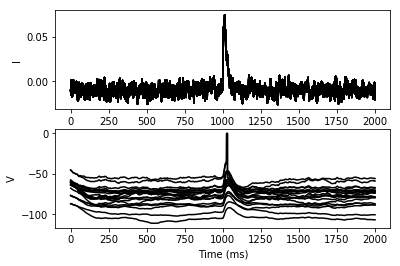

In [19]:
plt.subplot(211)
plt.plot(
    simfiles['subsample_base_l_g'].get_ser_examples_supp()[7, ...].T,
    simfiles['subsample_base_l_g'].ser_examples['I'][7, ...].T, 'k-'
)
plt.ylabel('I')

plt.subplot(212)
plt.plot(
    simfiles['subsample_base_l_g'].get_ser_examples_supp()[7, ...].T,
    simfiles['subsample_base_l_g'].ser_examples['V'][7, ...].T, 'k-'
)
plt.ylabel('V')
plt.xlabel('Time (ms)')

plt.show()

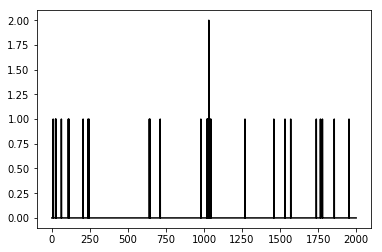

In [8]:
plt.plot(
    simfiles['subsample_base_m_g'].get_t_vec(),
    simfiles['subsample_base_m_g'].ser_spktrains[3, ...].sum(axis = 0),
    'k-'
)

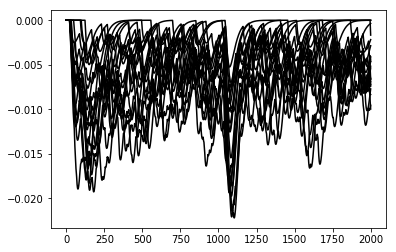

In [10]:
plt.plot(
    simfiles['subsample_base_m_g'].get_ser_examples_supp()[4, ...].T,
    simfiles['subsample_base_m_g'].ser_examples['feedforward_input'][4, ...].T,
    'k-'
)
plt.show()

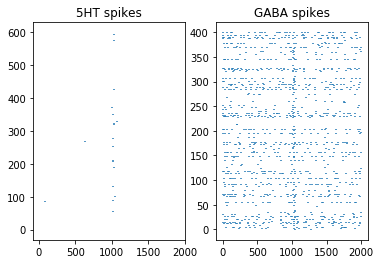

In [12]:
plt.subplot(121)
plt.title('5HT spikes')
plt.eventplot(simfiles['subsample_base_m_g'].get_ser_spktimes()[4])

plt.subplot(122)
plt.title('GABA spikes')
plt.eventplot(simfiles['subsample_base_m_g'].get_gaba_spktimes()[4])
plt.show()